Intro
-----

The first thing to understand about Covid-19 is the basic math that describes its spread.
Which numbers are pertinent, and why, and how are they related?

Number of Infected People
-------------------------

This number is quite difficult to estimate, but it's what everyone wants to know.

Case Counts
-----------

The total number of cases *reported* in a region since the outbreak began. 
This is the most commonly reported number, but it can easily mislead. 

First, most people recover but stay included in the case counts; thus case counts do not tell us how many people are currently sick. 
Second, roughly 20% of US citizens lack health insurance and are unlikely to get diagnosed and counted. 
Because that 20% is not evenly distributed through society, regions and localities with poorer citizens will likely have artificially low case counts.
Third, cases are often only counted if they are confirmed by lab test, but testing capacity...
- is low (in the US at least), lowering case counts
- increases over time, raising case counts as a function of time
- varies by region and community, so we cannot reliably compare case counts

To sum up: a case count looks to the average person like a number of sick people, but it isn't. 

Acknowledgements
----------------

Thank you to Johns Hopkins University for maintaining the data set, and thank you to Alex Braylan for showing me how to load and clean that data.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

from load_clean import load_case_counts

In [2]:
all_df = load_case_counts(Path.cwd())

### Accumulate incidents, grouped by most granular location

In [8]:
def unq(data):
    return np.unique(data)[0]

def cumulative(data):
    cumulative_confirmed = data.fillna(0).cummax()
    return list(cumulative_confirmed.values)

loc_df = (
    all_df
    .reset_index()
    .groupby("location")
    .agg({
        "confirmed": cumulative, # listize,
        "deaths": cumulative,
        "date": list,
        "province_state": unq,
        "country_region": unq,
        "latitude": unq,
        "longitude": unq
    })
)

### Prepare organization of data for presentation

In [9]:
loc_df["current"] = [np.max(x) if len(x) else 0 for x in loc_df.confirmed.values]
loc_df["duration"] = [len(x) for x in loc_df.confirmed.values]
nonchina_df = loc_df[loc_df["country_region"] != "Mainland China"]
us_df = loc_df[loc_df["country_region"] == "US"]

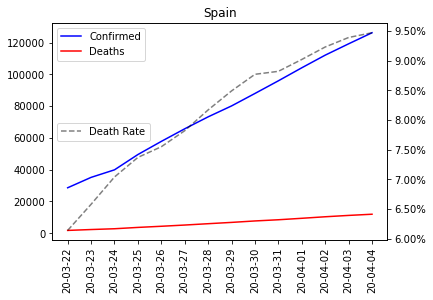

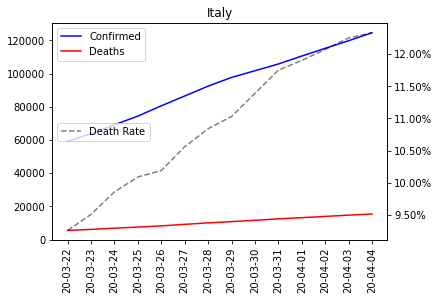

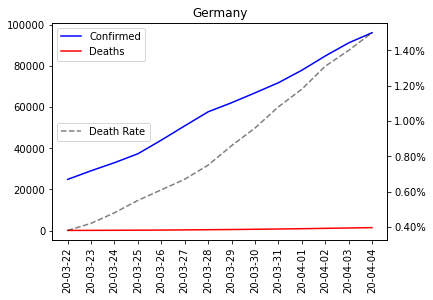

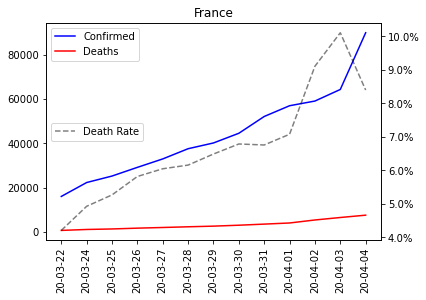

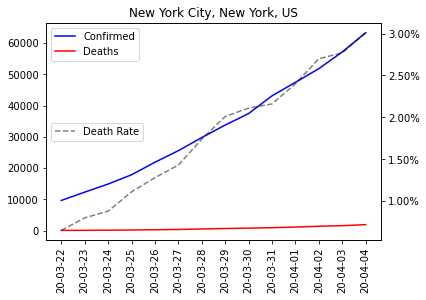

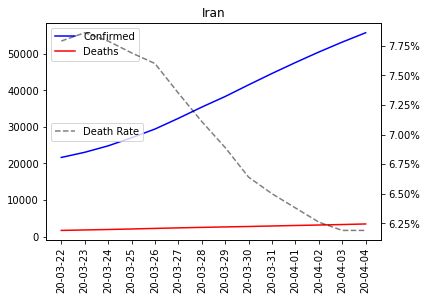

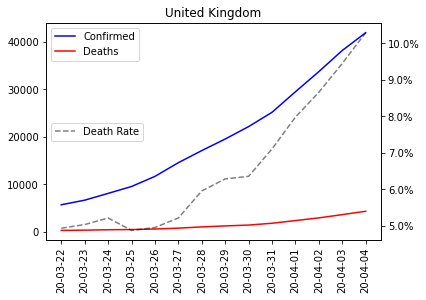

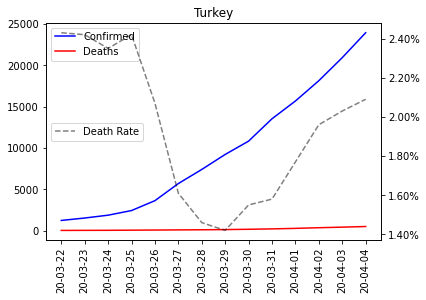

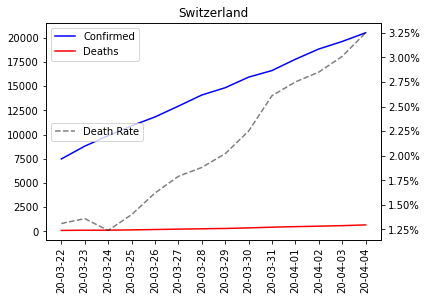

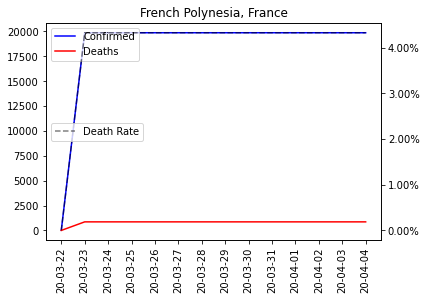

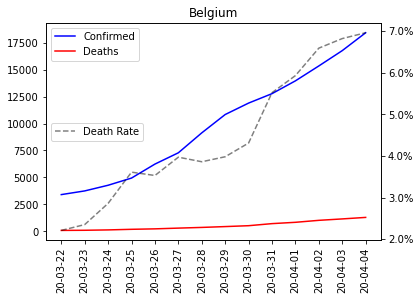

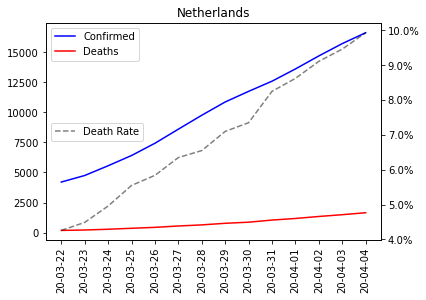

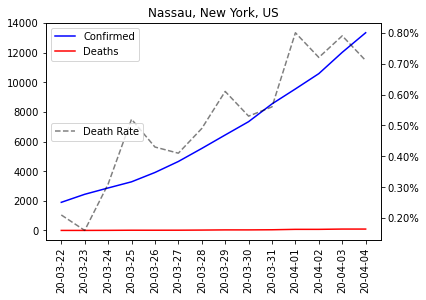

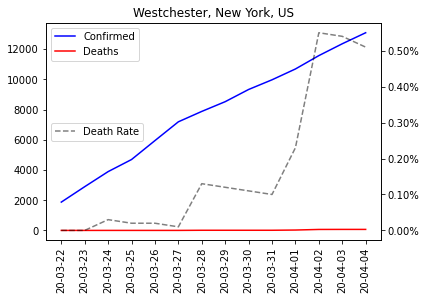

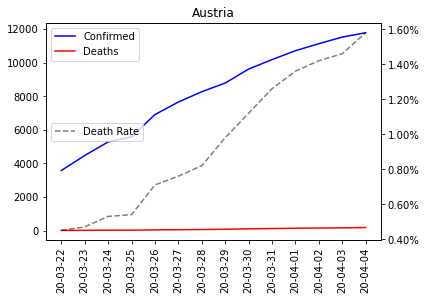

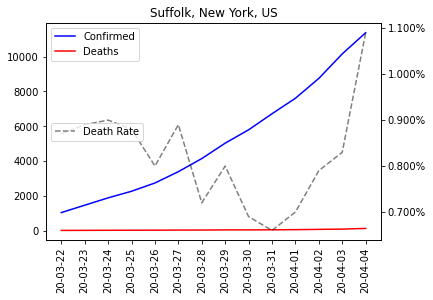

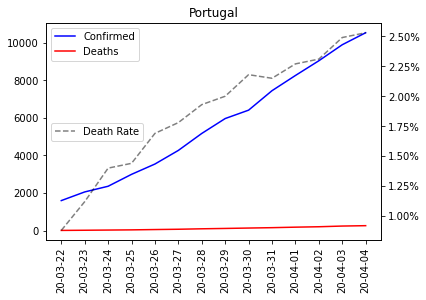

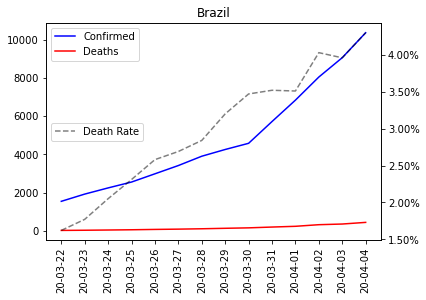

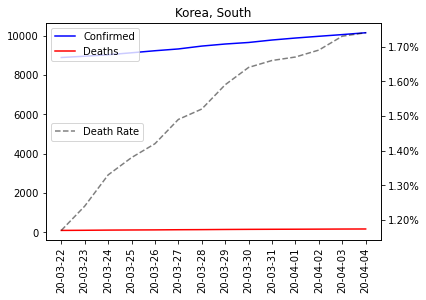

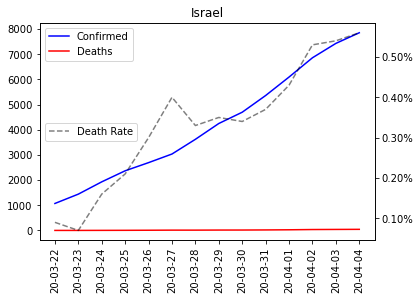

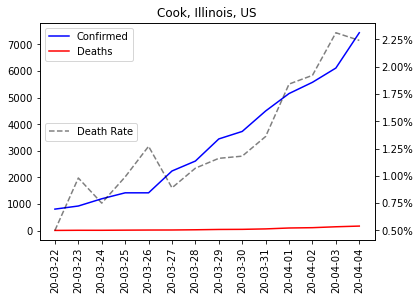

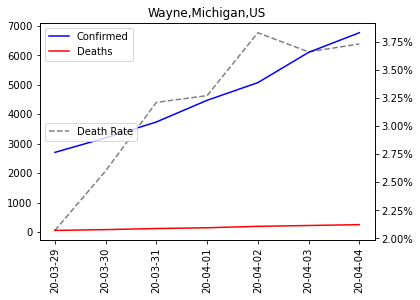

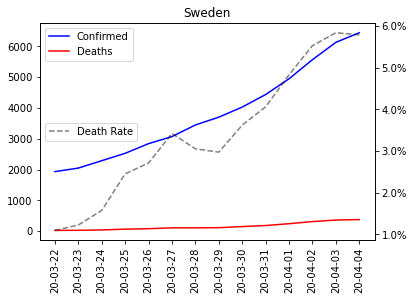

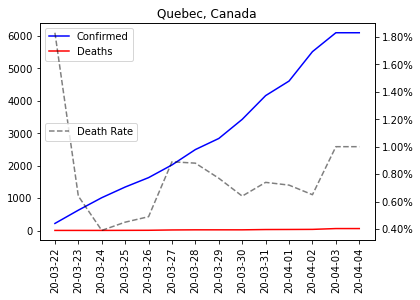

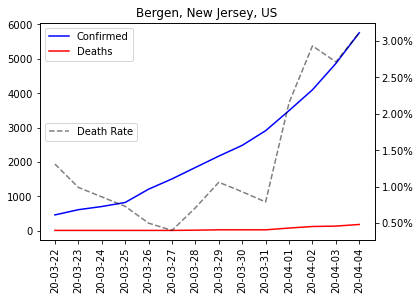

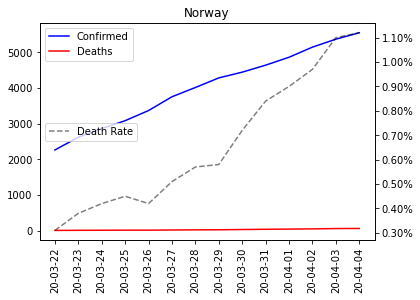

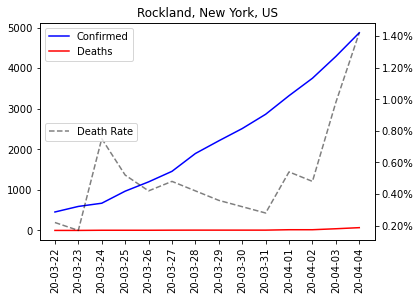

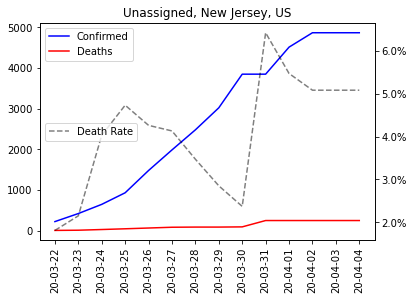

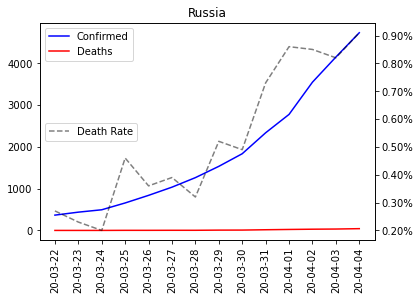

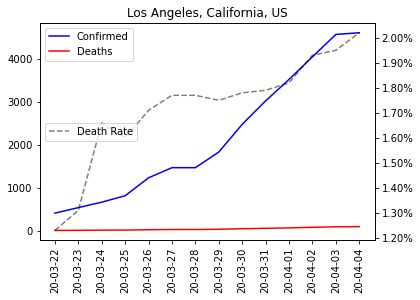

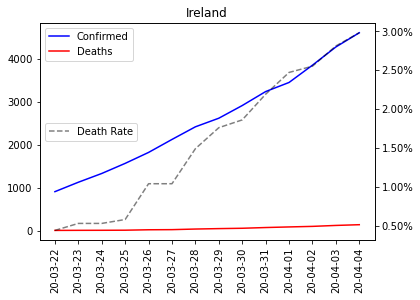

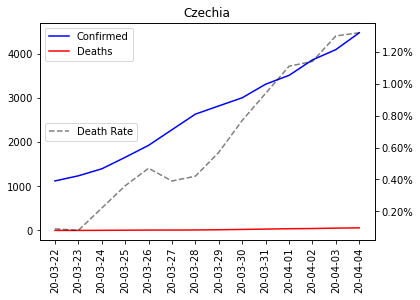

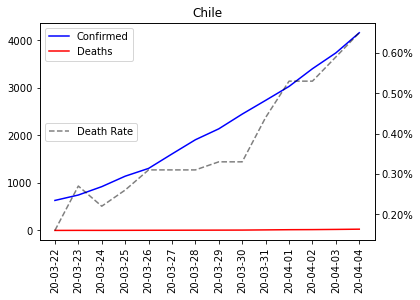

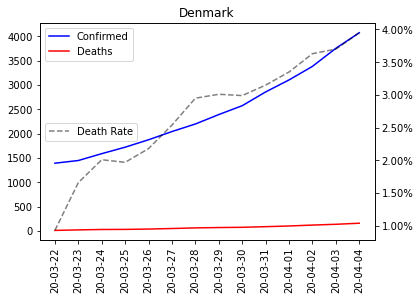

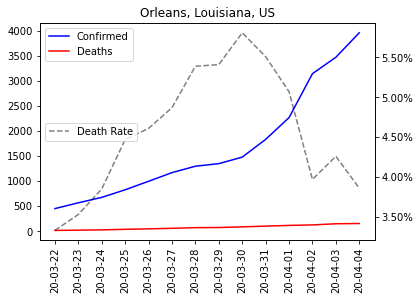

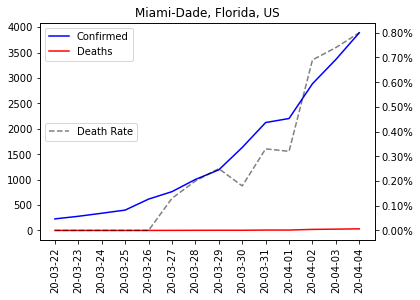

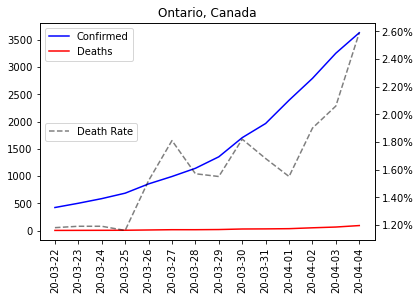

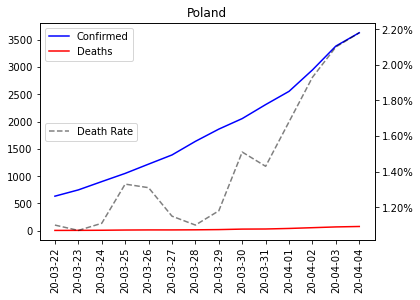

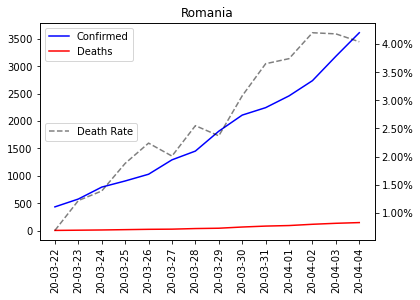

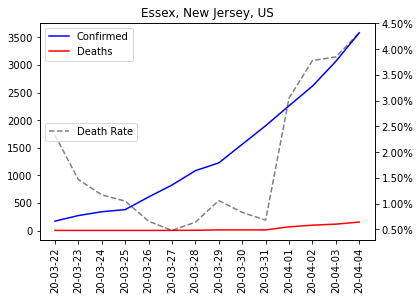

In [10]:
# plot_df = loc_df.sort_values("current", ascending=False) # all locations, ordered by case count
# plot_df = loc_df.sort_values("duration", ascending=False) # all locations, ordered by time since first case
plot_df = nonchina_df.sort_values("current", ascending=False) # non-China locations, ordered by case count
# plot_df = us_df.sort_values("current", ascending=False) # US locations, ordered by case count
for index, row in plot_df.iloc[:40].iterrows():
    fig, ax = plt.subplots()
    plt.xticks(rotation=90)
    ax.plot(row["date"], row["confirmed"], "b")
    ax.plot(row["date"], row["deaths"], "r")
    ax2 = ax.twinx()
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    death_rate = np.round(np.array(row["deaths"]) / np.array(row["confirmed"]) * 100, 2)
    ax2.plot(row["date"], death_rate, "k--", alpha=0.5)
    ax.legend(["Confirmed", "Deaths"], loc="upper left")
    ax2.legend(["Death Rate"], loc="center left")
    plt.title(index)
    plt.show()